# Q1-1.モータの制御

## 問題
**Q1-1.ヘッドを左に45°向かせてみましょう。**

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# sleep関数を使うためにtimeのライブラリをインポートする。
import time
# モータ制御の際はakari_clientのライブラリをインポートする
from akari_client import AkariClient

# AkariClientのインスタンスを作成する。
akari = AkariClient()
# 関節制御用のインスタンスを取得する。
joints = akari.joints
# サーボONにする。
joints.enable_all_servo()

### ここから問題  ###
"""(モータを動かす関数)"""
### ここまで  ###

# 1秒待つ
time.sleep(1)
# 現在位置を取得してコマンドラインに表示
print("現在位置は" + str(joints.get_joint_positions()) + "です。")

### 動作イメージ

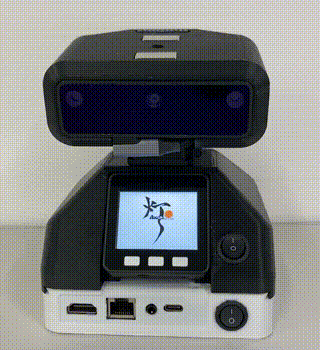

In [2]:
from IPython.display import Image
Image('image/q1-1.gif')

### ヒント
  
ヘッドを動かすには、_move_joint_positions()_　を使います。  
```python
    AkaliClient::JointManager::move_joint_positions(
        pan: Optional[float] = None,
        tilt: Optional[float] = None
    ) -> None:
```
> サーボの移動する角度を指定して移動する。単位は[rad]

下記のセルを実行すると使い方の例が見られます。

In [ ]:
# モータ制御の際はakari_clientのライブラリをインポートする
from akari_client import AkariClient

# AkariClientのインスタンスを作成する。
akari = AkariClient()
# 関節制御用のインスタンスを取得する。
joints = akari.joints
# サーボONにする。
joints.enable_all_servo()
#panのサーボを0.3rad、tiltのサーボを0.5rad移動する。
joints.move_joint_positions(pan=0.3, tilt=0.5)

上のセルの例を参考に、joints.move_joint_positions()を使ってpanを45°に指定しましょう。  
ただ、この関数の角度はラジアン指定なので、45°をラジアンに変換した値を入れる必要があります。

完成したら実行してみましょう。  
AKARIのヘッドが左45°の方向を向いて、コマンドラインに現在の関節角が表示されたら成功です。

## 回答と解説
以下は回答例と解説です。動作が正しければ、これと同じでなくても問題ありません。

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# sleep関数を使うためにtimeのライブラリをインポートする。
import time
# モータ制御の際はakari_clientのライブラリをインポートする
from akari_client import AkariClient

# AkariClientのインスタンスを作成する。
akari = AkariClient()
# 関節制御用のインスタンスを取得する。
joints = akari.joints
# サーボONにする。
joints.enable_all_servo()

### ここから問題  ###
joints.move_joint_positions(pan=0.785)
### ここまで  ###

# 1秒待つ
time.sleep(1)
# 現在位置を取得してコマンドラインに表示
print("現在位置は" + str(joints.get_joint_positions()) + "です。")

#### 17行目:
```python
joints.move_joint_positions(pan=0.785)
```

joints.move_joint_positions()でモータの移動先を指定します。  
今回はpanのみ45°動かすので、引数はpanのみです。  
45°=0.785[rad]なので、引数はpan=0.785となります。  


## Tips

### 全行解説
最初の問題なのでpythonのコードの書き方の解説を兼ねて、全行解説します。  
やや難しい部分もあるかと思いますが、現時点では気にせず読み飛ばしても大丈夫です。

#### 1行目:
```python
#!/usr/bin/env python
```

これはShebang(シバン)というもので、Linux環境でスクリプトの1行目に記述する、特殊な文字列のことです。  
/usr/bin/env pythonとなっているのは、システム内でPATHが通っている環境のpythonを使うということになります。  
難しいですが、 **現時点では特に気にせず毎回最初の行に入れておきましょう。**  

#### 2行目:
```python
# -*- coding: utf-8 -*-
```

同様にShebangで、日本語のエンコードを選択しておきます。ここではUTF-8を選択しています。  
現状互換性が一番高いと思います。 **これも毎回入れておきましょう。**  

#### 4-7行目:
```python
# sleep関数を使うためにtimeのライブラリをインポートする。
import time
# モータ制御の際はakari_clientのライブラリをインポートする
from akari_client import AkariClient
```

4,6行目の#で始まる行はコメントとなり、実行時に無視されます。  
5行目はimport <method>という書き方で、外部のpythonライブラリのmethodを取り込んで利用するために使います。今回はtimeというライブラリをインポートしています。  
7行目はちょっと違う記述方法で、from <module> import <method>という書き方で、モジュールに記述されたPythonライブラリのmethodを取り込むために使います。
ここではakari_clientを使います。akari_clientはAKARIの制御に必要なライブラリとしてあらかじめインストールされています。  
この中のAkariClientをインポートしています。  
最初のうちは、 **ヘッドのモータ制御が必要な際は必ずインポートするもの** 、と覚えておいてください。

#### 9-12行目:
```python
# AkariClientのインスタンスを作成する。
akari = AkariClient()
# 関節制御用のインスタンスを取得する。
joints = akari.joints
```

AKARIのライブラリであるAkariClientを使用するには、最初にこのインスタンスの作成が必須となります。  
ここではそのインスタンスにakariという名前を付けています。  
また、モータ制御をするには、このakariの中のjointsのインスタンスを取得する必要があります。  
これらも **ヘッドのモータ制御をするために必要なもの** 、と覚えておいてください。  

#### 13-14行目
```python
# サーボONにする。
joints.enable_all_servo()
```

全サーボを有効状態にする関数を呼び出します。  
サーボを有効にしないと動かせないので、関節制御用のインスタンス取得とセットで実行するようにしましょう。  

#### 16-18行目:
```python
### ここから問題  ###
joints.move_joint_positions(pan=0.785)
### ここまで  ###
```

ここは回答と解説で説明した通りです。

#### 20-21行目:
```python
# 1秒待つ
time.sleep(1)
```

ここでは1秒待機させる関数を呼び出します。  
ここで5行目でimportしたtimeモジュール内のsleep()という関数を使います。引数は秒数なので、()内に1を入れることで1秒待機させることができます。  

#### 22-23行目:
```python
# 現在位置を取得してコマンドラインに表示
print("現在位置は" + str(joints.get_joint_positions()) + "です。")
```

print()は()内の値を文字として出力する関数です。  
ここでは、get_joint_positions()という関数を使って現在角度を取得して、それを結果として出力しています。  
この関数については次の問題で解説します。  

## 最後に
これでQ1-1は終了です。次は、モータの現在位置の取得方法を学習してみましょう。

[次の問題へ](q1-2_get_position.ipynb)